# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [9]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [10]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3067,13240,23127,3941,9959,731
1,6633,2096,4563,1389,1860,1892
2,21632,1318,2886,266,918,405


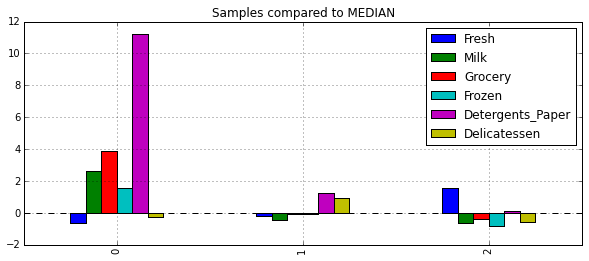

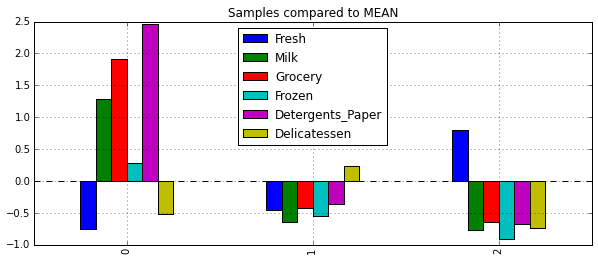

In [11]:
import matplotlib.pyplot as plot

# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [200, 410, 32]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

((samples-data.median()) / data.median()).plot(kind='bar', figsize=(10,4), title='Samples compared to MEDIAN')

((samples-data.mean()) / data.mean()).plot(kind='bar', figsize=(10,4), title='Samples compared to MEAN')

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

The client 0 (index=200) has large spending almost in every category. It has larger spending than the mean and median in every category, except for Fresh and Delicatessen. So it could be a supermarket or a retailer.

The client 1 (index=410) has a relative uniform annual spending on all product categories and they are not very high. In general, its spending are very close to the median and a little lower than the mean for almost every category. On the other hand, it has an important spending in delicatessen, so it could be a restaurant. It could be a small retailer too.

The client 2 (index=32) has a huge spending in Fresh products (larger than the mean and median) and small spending in all other categories, even under the mean and median of the dataset. So I think it could be any of the following kinds of establishments: Hotel, Restaurant or Cafe.

All clients have spending smaller than the maximums and larger than the minimums, so I can conclude that none of the establishments corresponds to very big ones or to very small ones.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [12]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature

#categories = data.keys()
categories = ['Delicatessen']

for category in categories:
    new_data = data.drop([category], axis = 1)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[category], test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)

    print "Category:",category, "F1 score:", score

Category: Delicatessen F1 score: -11.0236279005


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I've choosen the feature "Delicatessen" and the reported prediction score was equal to -11.02 (model fails to fit the data), so it is not possible to predict the delicatessen spending based on the other categories spending. The fact that the Delicatessen feature can not be predicted using the other features doesn't mean that it wont be useful for identifying some customers' spending habits.
 
Although the question doesn't ask for it, I ran the code above for all categories and all of them reported a very low or negative R^2 score, except the Grocery category (R^2=0.69). In addition to Grocery, only Milk and Detergents_Paper categories have a possitive R^2 score.

- Category: Fresh F1 score: -0.333070533605
- Category: Milk F1 score: 0.173438009379
- Category: Grocery F1 score: 0.699248196675
- Category: Frozen F1 score: -0.278249148824
- Category: Detergents_Paper F1 score: 0.348777454691
- Category: Delicatessen F1 score: -11.0236279005

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

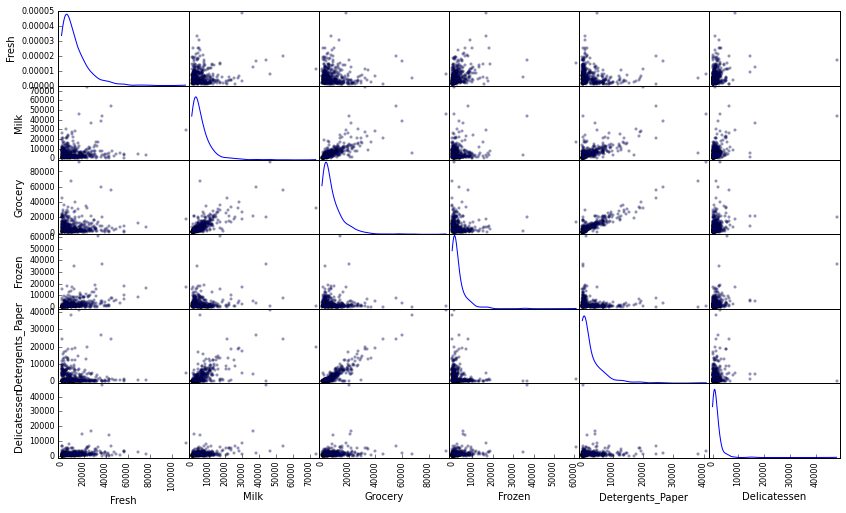

In [13]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

None of the features is normally distributed, all of them have a skewed right distribution.

The pair Grocery-Detergents_Paper looks to be the one with most correlation. Pairs Milk-Detergents_Paper and Milk-Grocery also show some correlation between them. The other categories don't show any clear grade of correlation.

In the previous question, I've choosen the Delicatessen category and, because its negative R^2 score, I've concluded that this feature can not be predicted based on the other features. In the graphs above, it is not possible to visualize any degree of correlation between Delicatessen and any other category, so this confirms the previous conclusion. 

Some interesting point is that the categories that have some correlation return a possitive R^2 score:
- Category: Milk F1 score: 0.173438009379
- Category: Grocery F1 score: 0.699248196675
- Category: Detergents_Paper F1 score: 0.348777454691

And those without a visible correlation in the scatter matrix have negative R^2 score:
- Category: Fresh F1 score: -0.333070533605
- Category: Frozen F1 score: -0.278249148824
- Category: Delicatessen F1 score: -11.0236279005


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

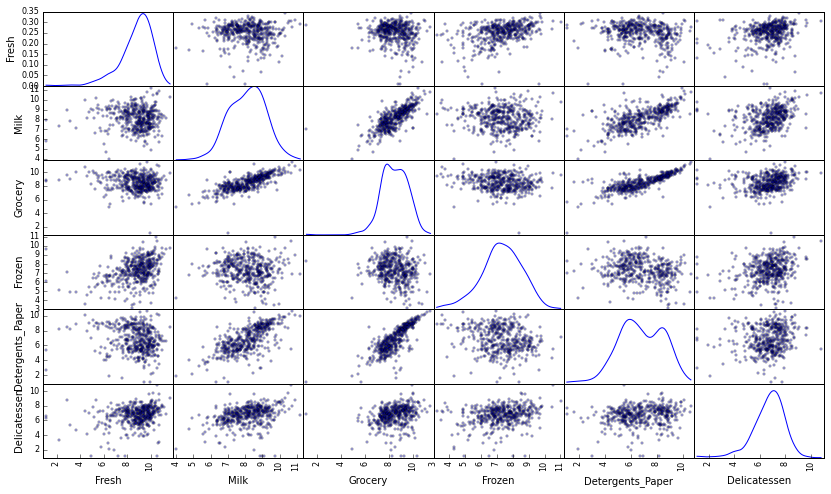

In [14]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [15]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
1,8.799812,7.647786,8.425736,7.236339,7.528332,7.545390
2,9.981929,7.183871,7.967627,5.583496,6.822197,6.003887


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [16]:
from collections import Counter

outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25, axis=0)
    print "25th percentile for the feature",feature, ":", Q1
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75, axis=0)
    print "75th percentile for the feature",feature, ":", Q3
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    IQR = Q3-Q1
    step = 1.5 * IQR
    print "Feature", feature, ":", "step:", step, "- (Q1 - step) =", Q1 - step, "- (Q3 + step) =",  Q3 + step
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # Save outliers for features 'Milk', 'Grocery' and 'Detergents_Paper'
    outliers+= log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    
# OPTIONAL: Select the indices for data points you wish to remove

# print outliers for more than one feature 
print "Data points considered outliers for more than one feature:"
display(log_data.loc[[item for item, count in Counter(outliers).iteritems() if count > 1]])

# Delete duplicated indexes
outliers = np.unique(outliers)
print "No: of Outliers:", len(outliers), "- Porcentage:", len(outliers)*100.0/log_data.shape[0]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
#good_data = log_data
print "Length good_data:", good_data.shape[0]

# Check outliers in sample data
for index in indices:
    if index in outliers:
        print "Outlier", index, "is in sample data."

25th percentile for the feature Fresh : 8.04805870221
75th percentile for the feature Fresh : 9.73706394795
Feature Fresh : step: 2.53350786861 - (Q1 - step) = 5.51455083361 - (Q3 + step) = 12.2705718166
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


25th percentile for the feature Milk : 7.33498124004
75th percentile for the feature Milk : 8.88048008859
Feature Milk : step: 2.31824827282 - (Q1 - step) = 5.01673296722 - (Q3 + step) = 11.1987283614
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


25th percentile for the feature Grocery : 7.67461620137
75th percentile for the feature Grocery : 9.27385367724
Feature Grocery : step: 2.3988562138 - (Q1 - step) = 5.27575998758 - (Q3 + step) = 11.672709891
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


25th percentile for the feature Frozen : 6.60967774917
75th percentile for the feature Frozen : 8.17589608318
Feature Frozen : step: 2.34932750101 - (Q1 - step) = 4.26035024816 - (Q3 + step) = 10.5252235842
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


25th percentile for the feature Detergents_Paper : 5.54810142479
75th percentile for the feature Detergents_Paper : 8.27434059875
Feature Detergents_Paper : step: 4.08935876094 - (Q1 - step) = 1.45874266385 - (Q3 + step) = 12.3636993597
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


25th percentile for the feature Delicatessen : 6.01187465693
75th percentile for the feature Delicatessen : 7.50672842655
Feature Delicatessen : step: 2.24228065442 - (Q1 - step) = 3.76959400251 - (Q3 + step) = 9.74900908097
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Data points considered outliers for more than one feature:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


No: of Outliers: 42 - Porcentage: 9.54545454545
Length good_data: 398


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Data points considered outliers for more than one feature:

|  | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen | Outlier in |
| :--------------: | :--------------: | :--------------: | :--------------: | :--------------: | :--------------: |
|128 | 4.941642 | 9.087834 | 8.248791  | 4.955827 | 6.967909 | 1.098612 | Fresh, Delicatessen |  
|154 | 6.432940 | 4.007333 | 4.919981  | 4.317488 | 1.945910 | 2.079442 | Milk, Grocery, Delicatessen |
|65  | 4.442651 | 9.950323 | 10.732651 | 3.583519 | 10.095388 | 7.260523 | Fresh, Frozen, Delicatessen |
|66  | 2.197225 | 7.335634 | 8.911530  | 5.164786 | 8.151333 | 3.295837 | Fresh, Delicatessen |
|75  | 9.923192 | 7.036148 | 1.098612  | 8.390949 | 1.098612 | 6.882437 | Grocery, Detergents_Paper |

- Feature Fresh : step: 2.53350786861 - (Q1 - step) = 5.51455083361 - (Q3 + step) = 12.2705718166
- Feature Milk : step: 2.31824827282 - (Q1 - step) = 5.01673296722 - (Q3 + step) = 11.1987283614
- Feature Grocery : step: 2.3988562138 - (Q1 - step) = 5.27575998758 - (Q3 + step) = 11.672709891
- Feature Frozen : step: 2.34932750101 - (Q1 - step) = 4.26035024816 - (Q3 + step) = 10.5252235842
- Feature Detergents_Paper : step: 4.08935876094 - (Q1 - step) = 1.45874266385 - (Q3 + step) = 12.3636993597
- Feature Delicatessen : step: 2.24228065442 - (Q1 - step) = 3.76959400251 - (Q3 + step) = 9.74900908097

It's not easy to decide what data points to remove. Perhaps the optimal approach is to remove all outliers, but the thing is that the set of inputs that have at least one outlier feature is close to 9.5% of the entire dataset. It is a significant percentage. Anyway, there are still 398 samples in the data set, and because a data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal, I've decided to remove any datapoint with outliers in any of its features.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

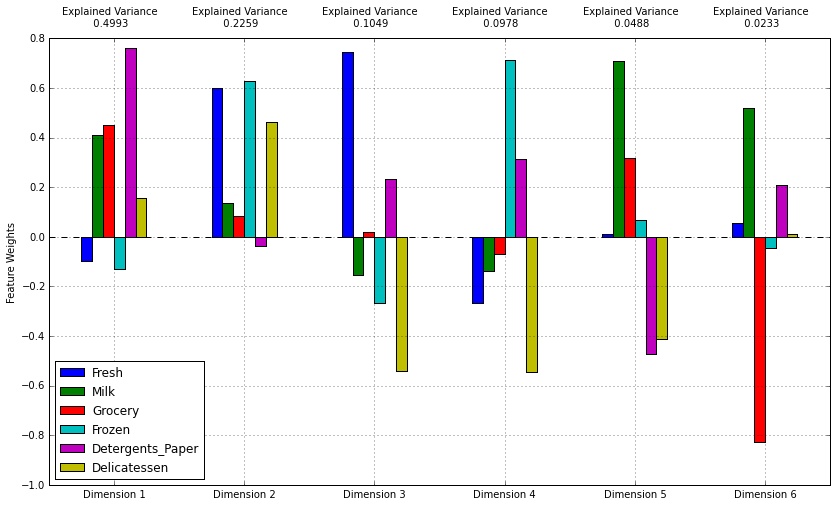

In [17]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=good_data.shape[1])
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

### **Answer:**

Variance in the data explained in total by:
- First and second principal components: 0.4993 + 0.2259 = **0.7252** 
- First four principal components: 0.4993 + 0.2259 + 0.1049 + 0.0978 = **0.9279**

The first principal component correlates most strongly with Detergents_Paper, and significantly with Milk and Grocery. It is made up of large positive weights in Detergents_Paper, and lesser but still sizeable positive weights on Grocery and Milk. It also correlates with a decrease in Fresh and Frozen. This PC shows that there are a set of customers that have similar spending in Detergents_Paper, Milk, Grocery together, where are some customers that buy a lot of them while others don't. This dimension is best categorized by customer spending on retail goods.

The second principal component is made up of significative positive weights in Fresh, Frozen and Delicatessen; a small positive weights in Milk and Grocery and very small weight in Detergents_Paper. This PC has a meaning very similar than the PC, but it has less explained variance and the categories involved are Fresh, Frozen and Delicatessen. This PC is best categorized by Cafes or Restaurants. Maybe its Detergents_Paper spending is to slow for representing hotels.

The third principal component has a very large positive weight in Fresh and small positive weight in Detergents_Paper. Its weight in Grocery is practically nil; and have negative weights in Milk, Frozen and Detergents_Paper. This PC shows, for example, that there are a set of customers that buy a lot of fresh products and very few of Delicatessen and vice versa, some customers who buy lot of Delicatessen and very few of Fresh products. I think that his dimension is best categorized by hotels, and maybe cafes or restaurants.

The fourth principal component is made up of large positive weight in Frozen and large negative weight in Delicatessen. It is conformed by medium positive weight in Detergents_Paper and negative in the other categories. This PC describes a similar behaviour than the third PC but with the Frozen category instead of Fresh products. This fourth dimension maybe represents the same kind of customer that the third one, that is, cafes, restaurant and hotels.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [18]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,3.0820,0.1314,-0.3994,1.4197,0.4747,-0.2263
1,0.5266,0.0510,-0.2044,-0.2087,-1.0045,-0.0881
2,-0.5541,-1.0705,1.8501,-0.9902,-0.6066,0.0311


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

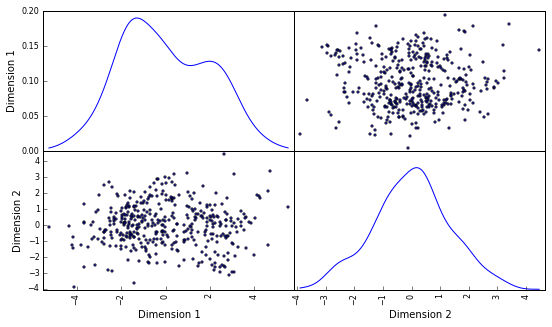

In [19]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# Produce a scatter matrix for pca reduced data
pd.scatter_matrix(reduced_data, alpha = 0.8, figsize = (9,5), diagonal = 'kde');

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [226]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,3.0820,0.1314
1,0.5266,0.0510
2,-0.5541,-1.0705


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

sklearn documentation has a very interesting table that compares some K-Means and GMM characteristics, pros and cons: 
                
| Method name | Parameters | Scalability | Usecase | Geometry (metric used) |
| :--------------: | :--------------: | :--------------: | :--------------: | :--------------: | 
|K-Means | number of clusters | Very large n_samples, medium n_clusters with MiniBatch code | General-purpose, even cluster size, flat geometry, not too many clusters  | Distances between points | 
| Gaussian mixtures | many | Not scalable  | Flat geometry, good for density estimation | Mahalanobis distances to centers |

**KMeans**

The KMeans algorithm clusters data by trying to separate samples in K groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples.

Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids.

K-means algorithm assigns each point to the closest cluster taking "hard decisions". 

**GMM**

Gaussian Mixture Model is a clustering algorithm that uses an iterative technique called Expectation Maximization. In GMM, clusters are assumed to each have an independent Gaussian distribution, each with their own mean and covariance matrix.

Expectation Maximization is an iterative technique that feels a lot like the iterative approach used in k-means clustering. In the “Expectation” step, we will calculate the probability that each data point belongs to each cluster (using our current estimated mean vectors and covariance matrices). This seems analogous to the cluster assignment step in k-means. In the “Maximization” step, we’ll re-calculate the cluster means and covariances based on the probabilities calculated in the expectation step. This seems analogous to the cluster movement step in k-means.

An important difference with k-means is that standard k-means performs a hard assignment of data points to clusters–each point is assigned to the closest cluster. With Gaussian Mixture Models, what we will end up is a collection of independent Gaussian distributions, and so for each data point, we will have a probability that it belongs to each of these distributions / clusters. KMeans can be seen as a special case of Gaussian mixture model with equal covariance per component.

GMM Pros:
- Speed: it is the fastest algorithm for learning mixture models.
- Agnostic:	as this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.

GMM Cons:
- Singularities: when one has insufficiently many points per mixture, estimating the covariance matrices becomes difficult, and the algorithm is known to diverge and find solutions with infinite likelihood unless one regularizes the covariances artificially.
- Number of components: this algorithm will always use all the components it has access to, needing held-out data or information theoretical criteria to decide how many components to use in the absence of external cues.


**Conclusion**

I think that the GMM approach (using ML) is much more smart and interesting than the one used by K-means. Because the dataset is relative small (avoids GMM scalability issues), the algorithm that I chose is GMM.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [23]:
from sklearn import mixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

n_component_range = range(2,10)
covariance_type_range = ['spherical', 'tied', 'diag', 'full']
max_score = -2.0
best_cov_type = ""
best_n_comp = "NaN";
preds = None
centers = None
sample_preds = None
prob_samples_preds = None

for n_components in n_component_range:
    # TODO: Apply your clustering algorithm of choice to the reduced data
    for cov_type in covariance_type_range:
        clusterer = mixture.GMM(n_components, covariance_type=cov_type, random_state=0, n_init=10)
        clusterer.fit(reduced_data)

        # TODO: Predict the cluster for each data point
        temp_preds = clusterer.predict(reduced_data)

        # TODO: Find the cluster centers
        temp_centers = clusterer.means_

        # TODO: Predict the cluster for each transformed sample data point
        temp_sample_preds = clusterer.predict(pca_samples)
        
        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        score = silhouette_score(reduced_data, temp_preds, random_state=0, metric='euclidean')
        
        if score > max_score:
            max_score = score
            best_cov_type = cov_type
            best_n_comp = n_components
            preds = temp_preds
            centers = temp_centers
            sample_preds = temp_sample_preds
            prob_samples_preds = clusterer.predict_proba(pca_samples)
            
        print "- Silhouette score:", score, "bic score:", clusterer.bic(reduced_data), "for", n_components, "components and covariance type", cov_type

print "- Max. Silhouette score:", max_score, "for", best_n_comp, "components and covariance type", best_cov_type

- Silhouette score: 0.448878862156 bic score: 3071.05186496 for 2 components and covariance type spherical
- Silhouette score: 0.443810252901 bic score: 3061.89819406 for 2 components and covariance type tied
- Silhouette score: 0.443601474015 bic score: 3080.15827233 for 2 components and covariance type diag
- Silhouette score: 0.443759414328 bic score: 3079.23829669 for 2 components and covariance type full
- Silhouette score: 0.353155346778 bic score: 3086.45285796 for 3 components and covariance type spherical
- Silhouette score: 0.35981457449 bic score: 3079.79623873 for 3 components and covariance type tied
- Silhouette score: 0.357294514249 bic score: 3098.11524375 for 3 components and covariance type diag
- Silhouette score: 0.378174473718 bic score: 3111.82292481 for 3 components and covariance type full
- Silhouette score: 0.326605026768 bic score: 3104.71534104 for 4 components and covariance type spherical
- Silhouette score: 0.322039815735 bic score: 3095.34089273 for 4 co

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

##### **Answer:**

Silhouette score for several cluster numbers:

- Silhouette score: 0.448878862156 for 2 components and covariance type spherical
- Silhouette score: 0.443810252901 for 2 components and covariance type tied
- Silhouette score: 0.443601474015 for 2 components and covariance type diag
- Silhouette score: 0.443759414328 for 2 components and covariance type full
- Silhouette score: 0.353155346778 for 3 components and covariance type spherical
- Silhouette score: 0.35981457449 for 3 components and covariance type tied
- Silhouette score: 0.357294514249 for 3 components and covariance type diag
- Silhouette score: 0.378174473718 for 3 components and covariance type full
- Silhouette score: 0.326605026768 for 4 components and covariance type spherical
- Silhouette score: 0.322039815735 for 4 components and covariance type tied
- Silhouette score: 0.291646368377 for 4 components and covariance type diag
- Silhouette score: 0.275286254365 for 4 components and covariance type full
- Silhouette score: 0.336792939334 for 5 components and covariance type spherical
- Silhouette score: 0.327541554719 for 5 components and covariance type tied
- Silhouette score: 0.265822254317 for 5 components and covariance type diag
- Silhouette score: 0.278132406222 for 5 components and covariance type full
- Silhouette score: 0.317921050404 for 6 components and covariance type spherical
- Silhouette score: 0.336804940006 for 6 components and covariance type tied
- Silhouette score: 0.307122866447 for 6 components and covariance type diag
- Silhouette score: 0.251793766518 for 6 components and covariance type full
- Silhouette score: 0.34509667852 for 7 components and covariance type spherical
- Silhouette score: 0.320516207745 for 7 components and covariance type tied
- Silhouette score: 0.295333399467 for 7 components and covariance type diag
- Silhouette score: 0.253374263419 for 7 components and covariance type full
- Silhouette score: 0.331321787492 for 8 components and covariance type spherical
- Silhouette score: 0.338388685986 for 8 components and covariance type tied
- Silhouette score: 0.301156045457 for 8 components and covariance type diag
- Silhouette score: 0.230282301031 for 8 components and covariance type full
- Silhouette score: 0.318691857755 for 9 components and covariance type spherical
- Silhouette score: 0.319598634271 for 9 components and covariance type tied
- Silhouette score: 0.283717242517 for 9 components and covariance type diag
- Silhouette score: 0.245980819662 for 9 components and covariance type full

Parameter configuration that has the best silhouette score:
- Max. Silhouette score: 0.448878862156 for 2 components and covariance type spherical

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

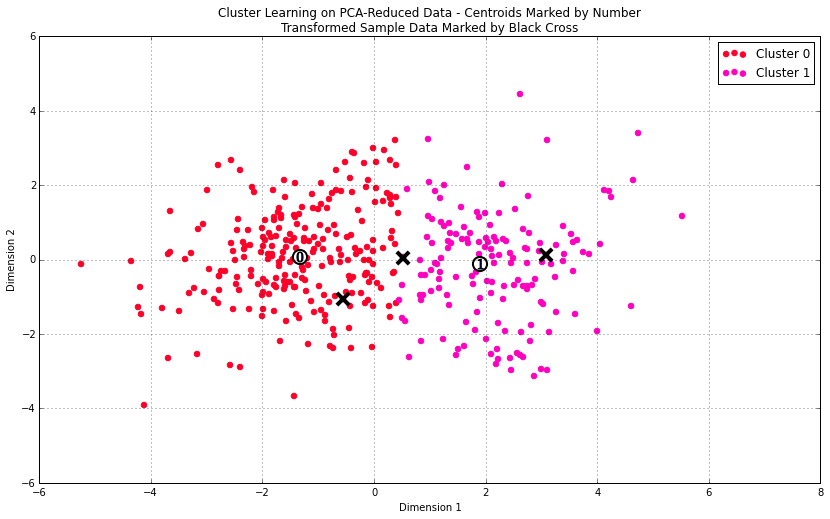

In [206]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9053,1976,2512,2099,324,757
Segment 1,5875,7230,10571,1228,3770,1150


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.00000
mean,12430.630653,5486.314070,7504.907035,3028.809045,2725.376884,1454.71608
std,12552.698266,6410.878177,9263.803670,3712.563636,4644.023066,1746.45365
min,255.000000,201.000000,223.000000,91.000000,5.000000,46.00000
25%,4043.500000,1597.250000,2125.000000,830.000000,263.250000,448.25000
50%,9108.000000,3611.500000,4573.000000,1729.500000,788.000000,997.50000
75%,16969.000000,6802.500000,9762.250000,3745.000000,3660.500000,1830.00000
max,112151.000000,54259.000000,92780.000000,35009.000000,40827.000000,16523.00000


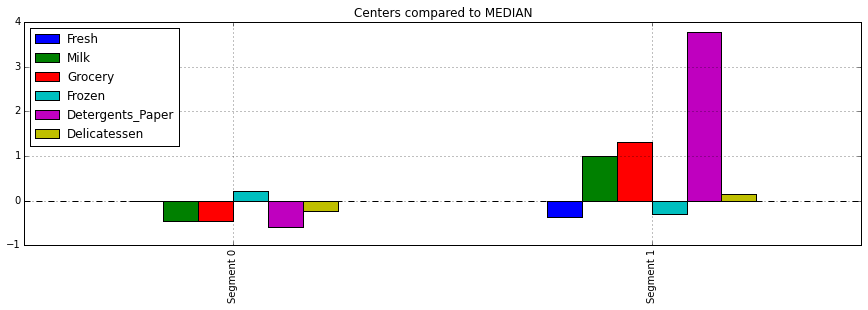

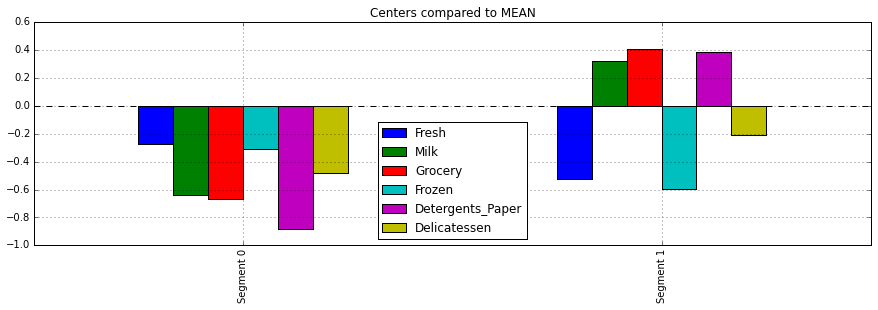

In [39]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

# Display a description of the dataset
display(np.exp(good_data).describe())

((true_centers-(np.exp(good_data)).median()) / (np.exp(good_data)).median()).plot(kind='bar', figsize=(15,4), title='Centers compared to MEDIAN')

((true_centers-(np.exp(good_data)).mean()) / (np.exp(good_data)).mean()).plot(kind='bar', figsize=(15,4), title='Centers compared to MEAN')

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

In this analysis, I considered the dataset without the removed outliers.

The segment 0 center is characterized by having a significative spending in Fresh products, and low in Detergents_Paper. Spending of this datapoint is under the mean for every category. Respect to the median, spending in all categories are very close to the median, mainly the Fresh, Frozen and Delicatessen categories.  So this segment could represent any of the following kinds of establishments: Hotels, Restaurants or Cafes.

The segment 1 center has important spending mainly in Grocery, but also in Milk, and Detergents_Paper. Spending in Grocery, Milk, and Detergents_Paper is significative, higher than the mean and median. Spending in Fresh and Frozen is small, even under the mean and median. This segment could be conformed by supermarkets, retailers, also big hotels and restaurants could fit in this segment.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [232]:
# Display the predictions (and probabilities too, I'm using GMM!!)
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred, "with a probability of", prob_samples_preds[i,pred] 
    

Sample point 0 predicted to be in Cluster 1 with a probability of 0.994746425113
Sample point 1 predicted to be in Cluster 1 with a probability of 0.506843430343
Sample point 2 predicted to be in Cluster 0 with a probability of 0.853118521887


**Answer:**

1) The client 0 (index=200, Fresh:3067 Milk:13240 Grocery:23127 Frozen:3941 Detergents_Paper:9959 Delicatessen:731) has large spending almost in every category, mainly in milk, grocery and Detergents_Paper. It clearly belongs to segment 1 and the probability returned by the model confirms it.

2) The client 1 (index=410, Fresh:6633 Milk:2096 Grocery:4563 Frozen:1389 Detergents_Paper:1860 Delicatessen:1892) is not a simple example: 
- Fresh=6633: more close to S1.
- Milk=2096: more close to S0.
- Grocery=4563: more close to S0
- Frozen=1389: more close to S1
- Detergents_Paper=1860: more close to S1	
- Delicatessen=1892: more close to S1

It's not easy to me to deduce to which segment this client belongs. It is not easy to the predictor model neither, it assigns the client 1 to the segment 1, but just with a probability of 0.5!

3) The client 2 (index=32, Fresh:21632	Milk:1318 Grocery:2886 Frozen:266 Detergents_Paper:918 Delicatessen:405) has a huge spending in Fresh products, and small in all other categories. It is clearly a Segment 0 client. The model predicts it to belong to cluster 0 with a probability of 0.85.


## Conclusion

### Question 10
Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether that change affects its customers positively or negatively. The wholesale distributor wants to consider changing its delivery service from 5 days a week to 3 days a week, but will only do so if it affects their customers positively. *How would you use the customer segments you found above to perform an A/B test for this change?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

We can not assume that the change will affects all customers equally, they belong to different segments because they are different. Just guessing, the change could be negative: those clients with the largest spending could have stock problem (mainly in segment 1); or those how buy perishable products, like fresh or milk products, could have to throw out a significative percentage of it. 

About how to use the customer segments to perform the A/B test, the following ideas come to me:
- I would check if clients belongs to the same segment after the test. Or more generally, if the cluster size increases (positive delivery service change for this segment) or decreases (negative delivery service change for this segment).
- I would check the centers (or means) of the segments. In this case, lower centers represents lower spending, so the test will be negative in this case.
- As a last resource, I would check if the two segments still exists. Maybe after the change even the client segments could change, both in a positive or a negative way.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a segment it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and has made estimates for each customer's annual spending of the six product categories. Knowing these estimates, the wholesale distributor wants to classify each new customer to one of the customer segments to determine the most appropriate delivery service.  
*Describe a supervised learning strategy you could use to make classification predictions for the ten new customers.*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

The wholesale distributor have estimated the annual spending of every one of the new ten new customers and it wants to know if they belong to the segment 0 or to the segment 1. It's clearly a classification problem. 

Once that the clusters have been identified, we can use K-means or, in this case, GMM to tag every example in the dataset with the segment to which it belongs. So, we obtain a dataset with a new feature, "custumer segment". This attribute could be used as class labels for some classification algorithm, like for example SVM, KNN, AdaBoost. After training any of this models, we'll be able to predict the segment for the new clients.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

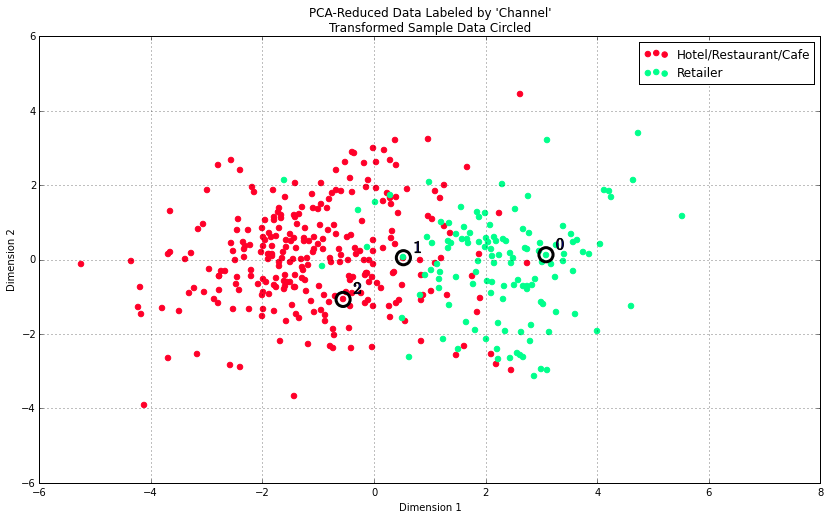

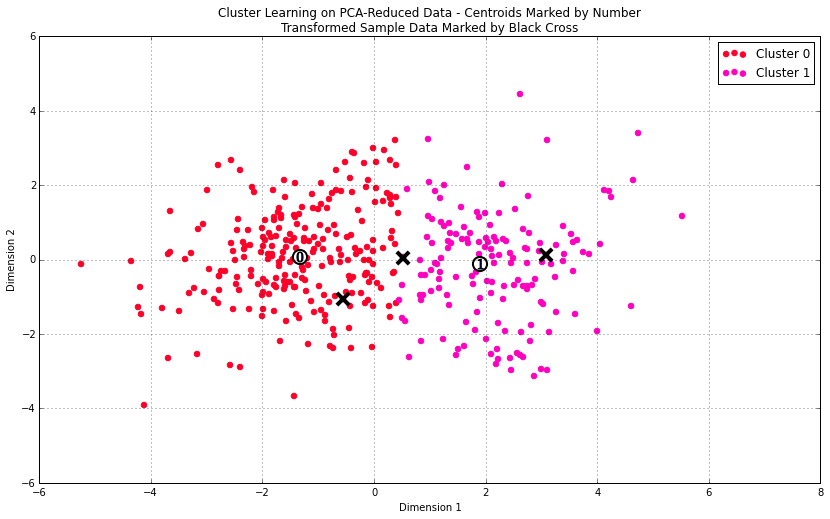

In [234]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

I like the clustering algorithm results. At simple view, I can recognize two principal clusters in the graph where the data is labeled by channel, it is the same quantity of segments that the GMM algorithm returns. The shape of every cluster identify be GMM also looks to be very good. 

The segment 0 could be considerer as purely Hotels/Restaurants/Cafes. There are very few retailer examples that fall in this cluster. On the other hand, there are some (not many) Hotels/Restaurants/Cafes that have similar spending to the retailers spending, so there is a portion (the one in the center of the graph) of the segment 1 that could not be considerer as purely retailers.

I'm not sure if the channel classification is consistent with the segment one. It is very good except in a little area where several Hotels/Restaurants/Cafes falls in the cluster 1. Maybe a classification like the following could be better:
Segment 0: small-medium Hotels/Restaurants/Cafes
Segment 1: retailers - large Hotels/Restaurants/Cafes


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.